#### Support Vector Classifier implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### creating a synthetic data points
from sklearn.datasets import make_classification

In [3]:
X,Y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

In [9]:
df = pd.DataFrame(X,columns=['0','1'])

<Axes: xlabel='0', ylabel='1'>

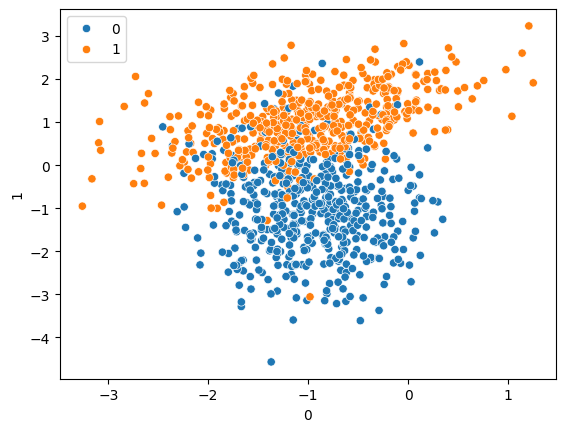

In [10]:
sns.scatterplot(data=df,x='0',y='1',hue=Y)

In [12]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=10)

In [11]:
from sklearn.svm import SVC
svc = SVC()

In [13]:
svc.fit(X_train,Y_train)

SVC()

In [14]:
Y_pred = svc.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
cr = classification_report(Y_test,Y_pred)
cm = confusion_matrix(Y_test,Y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       121
           1       0.86      0.98      0.91       129

    accuracy                           0.90       250
   macro avg       0.91      0.90      0.90       250
weighted avg       0.91      0.90      0.90       250

[[100  21]
 [  3 126]]


#### Hyperparameter tunning with SVC

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C":[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf']}

In [17]:
grid = GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [18]:
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.913 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [21]:
grid.best_score_

np.float64(0.8959999999999999)